# Исследование эффективности рекламных кампаний

В текущем исследовании мы изучим данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года, заказах и рекламных расходах развлекательного приложения Procrastinate Pro+.  На основании полученных результатов мы выявим и опишем наиболее вероятные причины неэффективности привлечения пользователей.

В ходе исследования мы изучим:
- откуда приходят пользователи и какими устройствами они пользуются,
- стоимость привлечения пользователей из различных рекламных каналов,
- сколько денег приносит каждый клиент,

и определим:
- когда расходы на привлечение клиента окупаются,
- факторы, мешающие привлечению клиентов.

Исследование пройдет в несколько этапов:
1. Обзор и подготовка данных.
2. Исследовательский анализ данных.
3. Исследование маргентинговых расходов.
4. Исследование окупаемость рекламы.

## Оглавление <a class="anchor" id="start"></a>

* [1. Обзор и подготовка данных](#1)
    * [2.1 Обзор датасетов](#1.1)
    * [2.2 Предобработка данных](#1.2)
    * [2.3 Вывод](#1.3)
* [2. Создание функций](#2)
* [3. Исследовательский анализ данных](#3)
    * [3.1 Составление профилей пользователей](#3.1)
    * [3.2 Изучение региональной активности пользователей](#3.2)
    * [3.3 Изучение типов устройств пользователей](#3.3)
    * [3.4 Изучение рекламных источников привлечения клиентов](#3.4)
    * [3.5 Вывод](#3.5)
* [4. Исследование расходов на маргетинг](#4)
    * [4.1 Изучение общих расходов на рекламу](#4.1)
    * [4.2 Изучение динамики изменения расходов во времени](#4.2)
    * [4.3 Изучение стоимости привлечения клиента](#4.3)
    * [4.4 Вывод](#4.4)
* [5. Исследование эффективности рекламы](#5)
    * [5.1 Анализ окупаемости рекламы](#5.1)
    * [5.2 Изучение конверсии и удержания пользователей приложения из США](#5.2)
    * [5.3 Изучение конверсии и удержания пользователей приложения из стран Европы](#5.3)
    * [5.4 Вывод](#5.4)
* [6. Итоги исследования](#6)  

##  1. Обзор и подготовка данных <a class="anchor" id="1"></a>

### 1.1 Обзор датасетов <a class="anchor" id="1.1"></a>

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.


In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt


In [2]:
#читаем и сохраняем данные

visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

#изучим каждый датасет
display(visits.head())
print(visits.info())

display(orders.head())
print(orders.info())

display(costs.head())
costs.info()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


По полученной информации о каждом датасете видно, что пропуски в данных отсутствуют. Однако, в некоторых столбцах данных хранятся в некорректном формате, что затруднит дальнейшую работу с ними. Выполним предобработку данных по каждому датасету.

### 1.2 Предобработка данных <a class="anchor" id="1.2"></a>

В рамках подготовки данных к исследованию, приведем название столбцов к нижнему регистру и заменим пробелы на символ "_". Так же проверим наличие дубликатов в данных и изменим тип данных в столбах 'session_start', 'event_dt' на datetime, а в столбце 'dt' - на тип dt.date.

In [3]:
#приведем название столбцов к нижнему регистру и заменим пробелы на нижнее подчеркивани
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

#изменим тип данных в столбцах с датами
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

#проверим наличие явных дубликатов в каждом датасете
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())


0
0
0


Явных дубликатов не выявлено.

Теперь проверим данные на возможные ошибки.

В датасете `visits` убедимся, что время сессий указано корректно, а значит время начала сессии всегда предшествует времени ее окончания.

In [4]:
#вычтем из даты окончания сесии дату начала и посмотрим минимальное значение. 
#если оно не отрицательное, значит время сессий указано корректно

print((visits['session_end'] - visits['session_start']).min())


0 days 00:00:00


Минимальное количество секунд равно нулю, значит, время сессий указано корректно.

В датасете `orders` проверим минимальное значение в столбце "revenue". Так как этот датасет содержит информацию о покупках, здесь не должно быть отрицательных и нулевых значений.

В датасете `costs` в стобце "costs" так же не должно быть отрицательных и нулевых значений.

In [5]:
print('Минимальное значение в столбце revenue', orders['revenue'].min())
print('Минимальное значение в столбце costs', costs['costs'].min())

Минимальное значение в столбце revenue 4.99
Минимальное значение в столбце costs 0.8


С данными о покупках и стоимости рекламы так же все в порядке.

### 1.3 Вывод <a class="anchor" id="1.3"></a>

Во время предобработки данных мы привели названия столбцов всех датасетов в соответствие с правилами оформления кода,  проверили данные на наличие пропусков и дубликатов, заменили тип данных в столбцах с датой на datetime для дальнейшей работы с ними. А так же проверили данные на ошибочные значения в числовых значениях.

## 2. Создание функций <a class="anchor" id="2"></a>

Для более удобной работы с данными в дальнейшем отдельно зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:
- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:
- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Эти функции мы будем использовать при исследовании.

In [6]:
#зададим функцию для создания профилей пользователей get_profiles()

def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [7]:
#зададим функцию для подсчёта Retention Rate get_retention()

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


In [8]:
#зададим функцию для подсчёта конверси get_conversion()

def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [9]:
#зададим функцию для подсчета LTV и ROI get_ltv()

def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 


In [10]:
#зададим функцию для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [11]:
#зададим функцию для построения графика удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [12]:
#зададим функцию  для построения графика конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 


In [13]:
#зададим функцию  для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 


## 3. Исследовательский анализ данных <a class="anchor" id="3"></a>

### 3.1 Составление профилей пользователей <a class="anchor" id="3.1"></a>

Для дальнейшего исследования нам потребуется составить профили пользователей. Воспользуемся созданной функцией get_profiles() и сохраним профили в таблице profiles, определим минимальную и максимальную даты привлечения пользователей.

In [14]:
profiles = get_profiles(visits, orders, costs)

min_date = profiles['dt'].min()
max_date = profiles['dt'].max()

display(profiles.head())
print(min_date)
print(max_date)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


2019-05-01
2019-10-27


Полученные профили пользователей содержат следующую информацию:
- `user_id` — уникальный идентификатор пользователя,
- `first_ts` - дата певого посещения приложения,
- `channel` - канал привлечения пользователя,
- `device` - тип устройства пользователя,
- `region` - страна пользователя,
- `dt` - дата первого посещения в формате dt.date,
- `month` - первый день месяца, в который это посещение произошло,
- `payer` - информация о том, совершал ли пользователем покупки, где True=совершал, False=не совершал,
- `acquisition_cost` - стоимость причлечения клиента (САС)

Данные представлены о клиентах, привлеченных в даты с 1 мая по 27 октяюбря 2019 года, что соответствует заявленныму временному периоду.

### 3.2 Изучение региональной активности пользователей <a class="anchor" id="3.2"></a>

Посмотрим, из каких стран пользователи приходят в приложение, и определим, на какую страну приходится больше всего платящих пользователей. Для этого построим таблицу, отражающую количество пользователей и долю платящих из каждой страны, и столбчатую диаграмму для более наглядной визуализации результатов.

In [15]:
#зададим функцию для  построения таблицы, отражающую количество пользователей и долю платящих по нужному параметру

def get_pivot(name):
    dim = name
    pivot = (profiles
    .pivot_table(index=dim, aggfunc=({'user_id':'nunique', 'payer': 'sum'}))
    .rename(columns={'user_id': 'number_of_users', 'payer': 'number_of_payers' })
          )
    pivot['payer_conversion%'] = (pivot['number_of_payers'] / pivot['number_of_users'] * 100).round(2)
    pivot['payer_proportion_of_total'] = pivot['number_of_payers'] / profiles['payer'].sum() * 100
    pivot = pivot.sort_values(by='number_of_payers', ascending=False)
    
    return pivot

,number_of_payers,number_of_users,payer_conversion%,payer_proportion_of_total
region,,,,
United States,6902,100002,6.90,77.716473
UK,700,17575,3.98,7.881995
France,663,17450,3.80,7.465376
Germany,616,14981,4.11,6.936156


- - - - - - - - - - - - - - - -


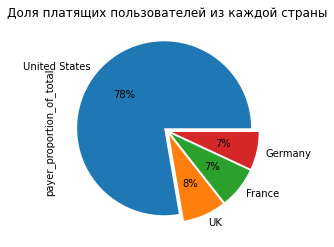

In [16]:
#построим таблицу по пользователям из разных стран
regions = get_pivot('region')

display(regions)
print('- - - - - - - - - - - - - - - -')

#строим круговую диграмму 
regions['payer_proportion_of_total'].plot(kind='pie', autopct='%1.0f%%', explode=(0.05, 0.05, 0.05, 0.05))
plt.title('Доля платящих пользователей из каждой страны');


Ориентируяся на полученные результаты, можно утверждать, что пользователи приложения приходят из Великобритании, Франции, США и Германии, при этом абсолютный лидер по количеству привлеченных клиентов являются Соединенные Штаты Америки. Среди всех привлеченных пользователеей за перирод с 1.05 по 27.10 2019 американцев в 5.5 раз больше, чем представителей других стран: более 100000 человек из США, и всего 15-17 тысяч пользователей на каждую другую страну.

Распределение долей платящих пользователей по странам так же соответствует вышеописанной картине. Пользователи из США составляют 78% от общего числа платящих пользователей приложения, здесь же самая высокая конверсия пользователей - почти 7%. 
На долю платящих пользователей Великобритании, Франции и Германии приходится лишь 8%, 7% и 7% от общего числа соответственно. Интересно, что в Германии конверсия пользователей выше, чем в Великобритании и Франции, и составляет более 4%. При этом, именно из Германии пришло наименьшее кол-во платящих пользователей.

### 3.3 Изучение типов устройств пользователей <a class="anchor" id="3.3"></a>

Теперь посмотрим, с каких типов устройств пользователи используют приложение, и определим, какие типы предпочитают платящие пользователи. Для этого так же построим таблицу, отражающую количество пользователей и долю платящих на каждый тип устройства, и столбчатую диаграмму для более наглядной визуализации результатов.

,number_of_payers,number_of_users,payer_conversion%,payer_proportion_of_total
device,,,,
iPhone,3382,54479,6.21,38.081297
Android,2050,35032,5.85,23.082986
Mac,1912,30042,6.36,21.529107
PC,1537,30455,5.05,17.306610


- - - - - - - - - - - - - - 


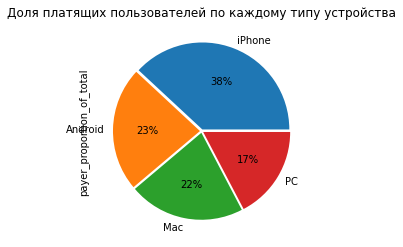

In [17]:
#строим таблицу с помощью заданной заранее функции get_pivot
devices = get_pivot('device')
display(devices)
print('- - - - - - - - - - - - - - ')

#строим круговую диграмму 
devices['payer_proportion_of_total'].plot(kind='pie', autopct='%1.0f%%', explode=(0.02, 0.02, 0.02, 0.02))
plt.title('Доля платящих пользователей по каждому типу устройства');

Среди устройств пользователей заметно выделяются смартфоны IPhone, на долю которых приходтся наибольшее количество привлеченных пользователей, в целом, и платящих пользователей в частности - соответственно 54.5тыс. человек и 38% от общего числа. Однако конверсия для пользователей этих устройств не самая высокая, здесь этот показатель равен 6.2%.  

Устройтства Android следующие по популярности среди пользователей приложения. На android было привлечено более 35 тысяч новых пользователей, платящие пользователи этих устройств составили 23% от общего числа.

В отношении персональных компьютеров (Mac и PC) интересно то, что количество привлеченных пользователей здесь почти одинаковое и составляет не более 30.5 тысяч человек. При этом пользователи Mac более охотно становятся покупателями, доля платящих пользователей здесь составляет 23% от общего числа, а конверсия - самая высокая - почти 6.4%. В то время как на PC доля покупателей не превышает 17% от общего количества платящих пользователей.

### 3.4 Изучение рекламных источников привлечения клиентов <a class="anchor" id="3.4"></a>

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Следуя знакомому алгоритму, постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения, и круговую диаграмму.

,number_of_payers,number_of_users,payer_conversion%,payer_proportion_of_total
channel,,,,
FaceBoom,3557,29144,12.20,40.051796
TipTop,1878,19561,9.60,21.146267
organic,1160,56439,2.06,13.061592
WahooNetBanner,453,8553,5.30,5.100777
AdNonSense,440,3880,11.34,4.954397
RocketSuperAds,352,4448,7.91,3.963518
LeapBob,262,8553,3.06,2.950118
OppleCreativeMedia,233,8605,2.71,2.623578
lambdaMediaAds,225,2149,10.47,2.533498


- - - - - - - - - - - - - - 


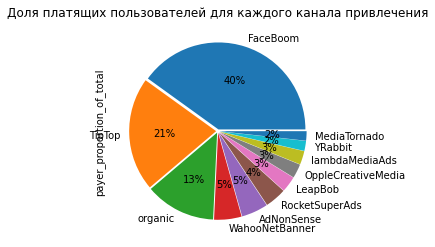

In [18]:
#строим таблицу с помощью заданной заранее функции get_pivot
channels = get_pivot('channel')
display(channels)
print('- - - - - - - - - - - - - - ')

#строим круговую диграмму 
channels['payer_proportion_of_total'].plot(kind='pie', autopct='%1.0f%%', explode=(0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02))
plt.title('Доля платящих пользователей для каждого канала привлечения');

Ситуация с каналами привлечения немного отличается. Здесь можно заметить, что наибольшое количество привлеченных пользователей, более 56 тысяч человек, пришли самостоятельно (т.е. через канал organic). Однако, они неохотно становятся покупателями в приложении - несмотря на большое количество новых пользователей, доля платящих  здесь составляет лишь 13% от общего количества покупателей.

Самый больший процент платящих пользователей приносит канал FaceBoom, 40% от числа всех покупателей. FaceBoom так же является вторым по количеству привлеченных пользователей за исследуемый период времени.

Канал TipTop занимает третье место по общему количеству пользователей, почти 20 тыс.человек, и второе по кол-ву платящих - здесь доля платящих пользователей составляет 21% от общего числа покупателей.

Остальные рекламные каналы привлекли от 2тыс до 8.5тыс новых пользователей, при этом процент покупателей, пришедших через эти каналы, составляет не более 5% от общего количества.

При этом можно заметить, что большое количество платящих пользователей не означают, что на этом канале высокая конверсия. Так, каналы FaceBoom, AdNonSense и lambdaMedia имеют примерно одинаковые поеказатели конверсии среди пользователей, однако, количество платящих пользователей, пришедших с этих каналов, значительно отличается.

In [19]:
profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'sum'})

,user_id,payer
region,,
France,17450,663
Germany,14981,616
UK,17575,700
United States,100002,6902


### 3.5 Вывод <a class="anchor" id="3.5"></a>

В ходе исследовательского анализа данных мы составили профили пользователей и изучили страны и устройства  пользователей, а так же рекламные каналы.

Ориентируяся на полученные результаты, можно утверждать, что `абсолютный лидер по количеству привлеченных клиентов - Соединенные Штаты Америки`, на долю которых приходится более 100000 новых пользователеей за период с 1.05 по 27.10.2019. В то время, как число новых пользователей из Великобритании, Франции и Германии не превышает 17.5 тысяч человек на каждую из стран. Распределение долей платящих пользователей по странам так же соответствует вышеописанной картине. Пользователи из США составляют 78% от общего числа платящих пользователей приложения. На долю платящих пользователей Великобритании, Франции и Германии приходится лишь 8%, 7% и 7% от общего числа соответственно. Интересно, что в Германии конверсия пользователей выше, чем в Великобритании и Франции, и составляет более 4%. При этом, именно из Германии пришло наименьшее кол-во платящих пользователей.

`Наиболее популярным устройством среди пользователей является смартфон IPhone`. Причем это справедливо, как для общего числа привлеченных пользователей, которое составляет 54.5 тыс человек, так и для количеситва платящих пользователей, доля которых составляет 38% от общего количества покупателей. Устройства на android так же популярны, однако показатели все же ниже: 35тыс новых пользователей, 23% - доля платящих с утого типа устройств. В отношении персональных компьютеров (Mac и PC) интересно то, что количество привлеченных пользователей здесь почти одинаковое и составляет около 30тыс человек. При этом пользователи Mac более охотно становятся покупателями, доля платящих пользователей здесь составляет 23% от общего числа. В то время как для PC этот показатель не превышает 17%.

`Среди рекламных каналов выделяются три канала, которые привели наибольшее количество новых пользователей за исследуемый период`. К ним относятся канал "organic", то есть пользователи, пришедшие самостоятельно, более 54тыс новых пользователей, канал FaceBoom, почти 30тыс человек, и канал TipTop, черезк который пришло почти 20 тыс пользователей. Однако, можно заметить, что самостоятельно пришедшие пользователи неохотно становятся покупателями, на их долю приходится лишь 13% от общего числа покупателей. Самым щедрым на платящих пользователей оказался канал FaceBoom, здесь доля покупателей составляет почти половину - 40%. Для канала TipTop этот показатель составляет 28% от общего числа. Остальные рекламные каналы привлекли от 2тыс до 8.5тыс новых пользователей, при этом процент покупателей, пришедших через эти каналы, составляет не более 5% от общего количества. При этом можно заметить, что большое количество платящих пользователей не означают, что на этом канале высокая конверсия. Так, каналы FaceBoom, AdNonSense и lambdaMedia имеют примерно одинаковые поеказатели конверсии среди пользователей, однако, количество платящих пользователей, пришедших с этих каналов, значительно отличается.

## 4. Исследование расходов на маргетинг <a class="anchor" id="4"></a>

### 4.1 Изучение общих расходов на рекламу <a class="anchor" id="4.1"></a>

Изучим марткетинговые расходы компании  за период с 1 мая по 27 октября 2019 года. Для этого посчитаем общую сумму раходов на маркетинг за исследуемый период и определим, как траты распределялись по рекламным источникам.

Общая сумма расходов на маркетинг составила 105497.0


,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


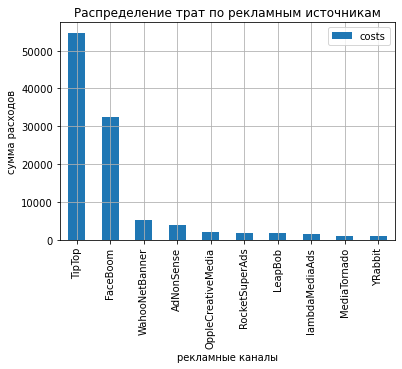

In [20]:
#узнаем общую сумму расходов на рекламу
print('Общая сумма расходов на маркетинг составила', costs['costs'].sum().round())
costs

#создадим сводную таблицу с указанием суммы расходов по каждому рекламному источнику
channel_costs = (costs
.pivot_table(index='channel', values='costs', aggfunc='sum')
.sort_values(by='costs', ascending=False)
)
display(channel_costs)

#построим столбчатую диаграмму для наглядной визуализации результатов
channel_costs.plot(kind='bar', grid=True)
plt.xlabel("рекламные каналы")
plt.ylabel("сумма расходов")
plt.title('Распределение трат по рекламным источникам');

Общая сумма расходов на маркетинг составила 105497 у.е., при этом больше всего денег было вложено в канал TipTop - почти 55 тысяч у.е.. Канал FaceBoom обошелся компании немного дешевле, здесь сумма расходов составила 32.5 тысячи у.е.. Полученная столбчатая диаграмма наглядно иллюстрирует значительную разницу между вложениями в вышеуказанные и остальные рекламные каналы.

В каналы WahooNetBanner, AdNonSense, OppleCreativeMedia, RocketSuperAds, LeapBob, lambdaMediaAds, MediaTornado и YRabbit было вложено в разы, а то и в десятки раз, меньше, траты на рекламу в этих каналах составили от 900 до 5 тыс у.е.

### 4.2 Изучение динамики изменения расходов во времени <a class="anchor" id="4.2"></a>

Посмотрим, как менялись расходы на рекламу в каждом источнике во времени. Для этого построим график, отражающий динамику изменений по неделям и месяцам.

In [21]:
#добавим в таблицу costs два столбца с указанием недели и месяца рекламной кампании
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month

#строим сводные таблицы с расходами по неделям и месяцам
week_costs = costs.pivot_table(index='channel', columns='week', values='costs', aggfunc='sum')
month_costs = costs.pivot_table(index='channel', columns='month', values='costs', aggfunc='sum')

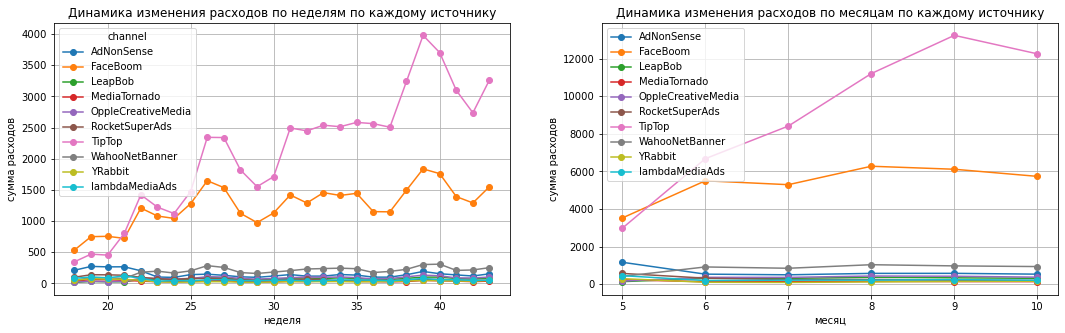

In [22]:
#строим график по месяцам
ax1 = plt.subplot(1, 2, 2)
month_costs.T.plot(grid=True, style = 'o-', figsize=(10,5), ax=ax1)
plt.legend(loc='upper left')
plt.xlabel("меcяц")
plt.ylabel("сумма расходов")
plt.title('Динамика изменения расходов по месяцам по каждому источнику');

#строим график по неделям 
ax2 = plt.subplot(1, 2, 1)
week_costs.T.plot(grid=True, style = 'o-', figsize=(18,5), ax=ax2)
plt.xlabel("неделя")
plt.ylabel("сумма расходов")
plt.title('Динамика изменения расходов по неделям по каждому источнику');

На полученных графиках хорошо заметно, что канал TipTop расходует наибольший бюджет. При этом расходы на рекламу в этом канале стабильно растут с мая по сентябрь, на который приходится максимально высокий показатель по расходам - более 12000 у.е./месяц. С 39й недели начинается резкий спад, и сумма расходов на рекламу в этом канале в неделю падает почти в 1,5 раза, с 4тыс/нед до 2.5тыс/нед. отражение этого факта так же можно увидеть на графике по месяцам - сумма расходов в октябре составляет на 1000 у.е.меньше на конечную дату(27 октября). Однако,на недельном графике можно заметить, что последняя неделя снова задает тенденцию на увеличение бюджета для этого рекламного источника.

FaceBoom так же является высокозатратным источником, однако расходы на него значительно ниже и распределены более равномерно. В месяц на рекламу здесь тратят около 6тыс у.е.

Динамика по остальным рекламным каналам на полученных графиках отражена не явно. Построим граыики без учета наиболее высокобюджетных каналов для более наглядной визуализации.

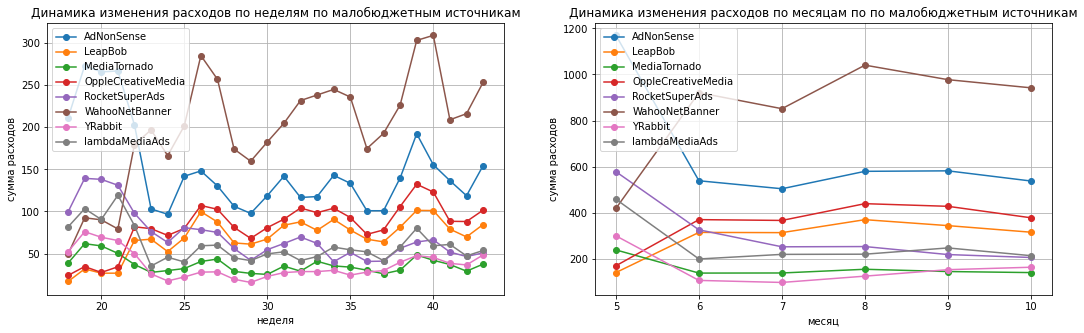

In [23]:
#строим график по месяцам по малобюджетнам каналам
#исключаем данные по TipTop и FaceBoom
ax1 = plt.subplot(1, 2, 2)
(month_costs
 .query('channel != "TipTop" and channel != "FaceBoom"')
 .T.plot(grid=True, style = 'o-', figsize=(10,5), ax=ax1)
)
plt.legend(loc='upper left')
plt.xlabel("меcяц")
plt.ylabel("сумма расходов")
plt.title('Динамика изменения расходов по месяцам по по малобюджетным источникам');

#строим график по неделям 
#исключаем данные по TipTop и FaceBoom
ax2 = plt.subplot(1, 2, 1)
(week_costs
 .query('channel != "TipTop" and channel != "FaceBoom"')
 .T.plot(grid=True, style = 'o-', figsize=(18,5), ax=ax2)
)
plt.legend(loc='upper left')
plt.xlabel("неделя")
plt.ylabel("сумма расходов")
plt.title('Динамика изменения расходов по неделям по малобюджетным источникам');

Полученные графики лучше иллюстрируют динамику изменения расходов по малобюджетным рекламным каналам. Если рассматривать период с июня(6й месяц) по конец изучаемого периода(27 октября), то можно отметить стабильность показателей по всем источникам, кроме WahooNetBanner. Бюджет на рекламу в этом источнике варьируется от месяца к месяцу в пределах 100-200 у.е. Траты на остальные каналы показывают практически одинаковые цифры на каждый месяц, начиная с июня. Даже учитывая тот факт, что рекламный бюджет "скачет" на недельном графике, конечная месячная сумма остается стабильной.

На графике динамики изменения расходов по месяцам можно так же заметить интересную закономерность. На начало изучаемого периода, 5й месяц - май, на каналы AdNonSense, RocketSuperAds и lambdaMediaAds приходятся наибольшие суммы расходов, 1200у.е/мес, 600у.е./мес и 500у.е./мес соответственно. При этом уже к июню эти показатели падают почти вдвое, и их обгоняют рекламные источники WahooNetBanner, OppleCreativeMedia и Leapboom, на которые в мае было потрачено значительно меньше денег.

### 4.3 Изучение стоимости привлечения клиента <a class="anchor" id="4.3"></a>

Теперь посмотрим на стоимость привлечения клиентов по каналам привлечения и в целом.

In [24]:
#рассчитаем общий средний CAC
print('Средняя стоимость привлечения клиента составила', round(profiles['acquisition_cost'].mean(), 1))

Средняя стоимость привлечения клиента составила 0.7


,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


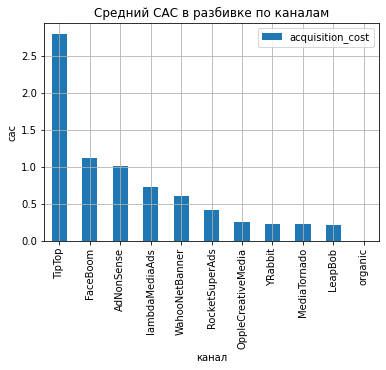

In [25]:
cac = (profiles
.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean')
.sort_values(by='acquisition_cost', ascending=False)
)

display(cac)
cac.plot(kind='bar', grid=True)
plt.xlabel("канал")
plt.ylabel("cac")
plt.title('Средний CАС в разбивке по каналам');

Как видно из полученных результатов, наиболее дорого компании обходятся пользователи, пришедшие через TipTop - 2.7 у.е. за привлеченного клиента. Стоимость привлечения пользователей через каналы FaceBoom и AdNonSense почти в 2.5 раза ниже и составляет всего 1 у.е. Пользователи, пришедшие из WahooNetBanner стоят дешевле, чем пользователи из lambdaMediaAds (0.6 у.е. против 0.72 у.е., несмотря на то, что траты компании на рекламу в этих источниках распредяляются с точностью наоборот. 
Для остальных источников показатель CAC не превышает 0.25 у.е. за пользователя.

### 4.4 Вывод <a class="anchor" id="4.4"></a>

Изучение данных о маргетинговых тратах позволило определить рекламные каналы, которые обходятся компании наиболее дорого. 

Самый дорогой источник привлечения клиентов - канал TipTop, траты на рекламу здесь превысили 54 тыс у.е., что составляет более половины всего бюджета, потраченного на рекламные кампании: общая сумма расходов на маркетинг за период с 01.05 по 27.10.2019 составила 105.5 тысяч у.е. При этом стоимость рекламы в этом канале постоянно растет, что можно наблюдать на полученных графиках динамики измениния трат во времени. Показатель CAC для этого канала так же самый высокий  - почти 2.8 у.е. за нового пользователя. 

Канал FaceBoom находится на втором месте по сумме трат на рекламные кампании: 32.5 тысячи у.е. были потрачены на привлечение пользователей через этот канал за исследуемый период. Реклама здесь обходится компании в стабильные 5.5-6 тысяч у.е. в месяц, а стоимость привлечения клиента составляет всего 1 у.е, что в 2.5 раза меньше, чем этот же показатель для канала TipTop.

Остальные рекламные каналы обходятся компании в разы дешевле. Так, на рекламу в канале WahooNetBanner было потрачено чуть более 5 тысяч у.е. за весь период. Несмотря на то, что канал WahooNetBanner находится на III месте по сумме трат на рекламные кампании за весь исследуемый период, показатель CAC здесь составляет всего 0.6 у.е, что ниже аналогичного показателя для AdNonSense(CAC = 1 у.е.) и lambdaMediaAds (CAC = 0.72 у.е.). При этом, общие расхода на канал AdNonSense составили почти 4 тысячи у.е., а на lambdaMediaAds всего 1.5 тысячм у.е.

На графике динамики изменения расходов по месяцам можно так же заметить интересную закономерность. На начало изучаемого периода, 5й месяц - май, на каналы AdNonSense, RocketSuperAds и lambdaMediaAds приходятся наибольшие суммы расходов, 1200у.е/мес, 600у.е./мес и 500у.е./мес соответственно. При этом, уже к июню эти показатели падают почти вдвое, и их обгоняют рекламные источники WahooNetBanner, OppleCreativeMedia и Leapboom, на которые в мае было потрачено значительно меньше денег.

## 5. Исследование эффективности рекламы <a class="anchor" id="5"></a>

Для выявления причин неэффективности привлечения пользователей помимо рекламных расходов нам необходимо оценить окупаемость рекламы с разбивкой по различным параметрам, учитывая при этом конверсию, удержание и пожизненную ценность пользователей.

Для проведения анализа отберем подходящие данные, ориентируясь на текущую дату - 01.11.2019, которая станет моментов анализа, и укажем горизонт анализа. Так как в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения, логично за горизонт анализа принять период в 14 дней.

In [26]:
#зададим момент анализа
observation_date = datetime(2019, 11, 1).date()  

#зададим горизонт анализа
horizon_days = 14   

### 5.1 Анализ окупаемости рекламы <a class="anchor" id="5.1"></a>

Для начала оценим общую ситуацию и посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, используя заданные заранее функции get_ltv() и plot_ltv_roi().

In [27]:
#исключаем из исследования бесплатных пользователей, пришедших самостоятельно (канал organic)
profiles_filtered = profiles.query('channel != "organic"')

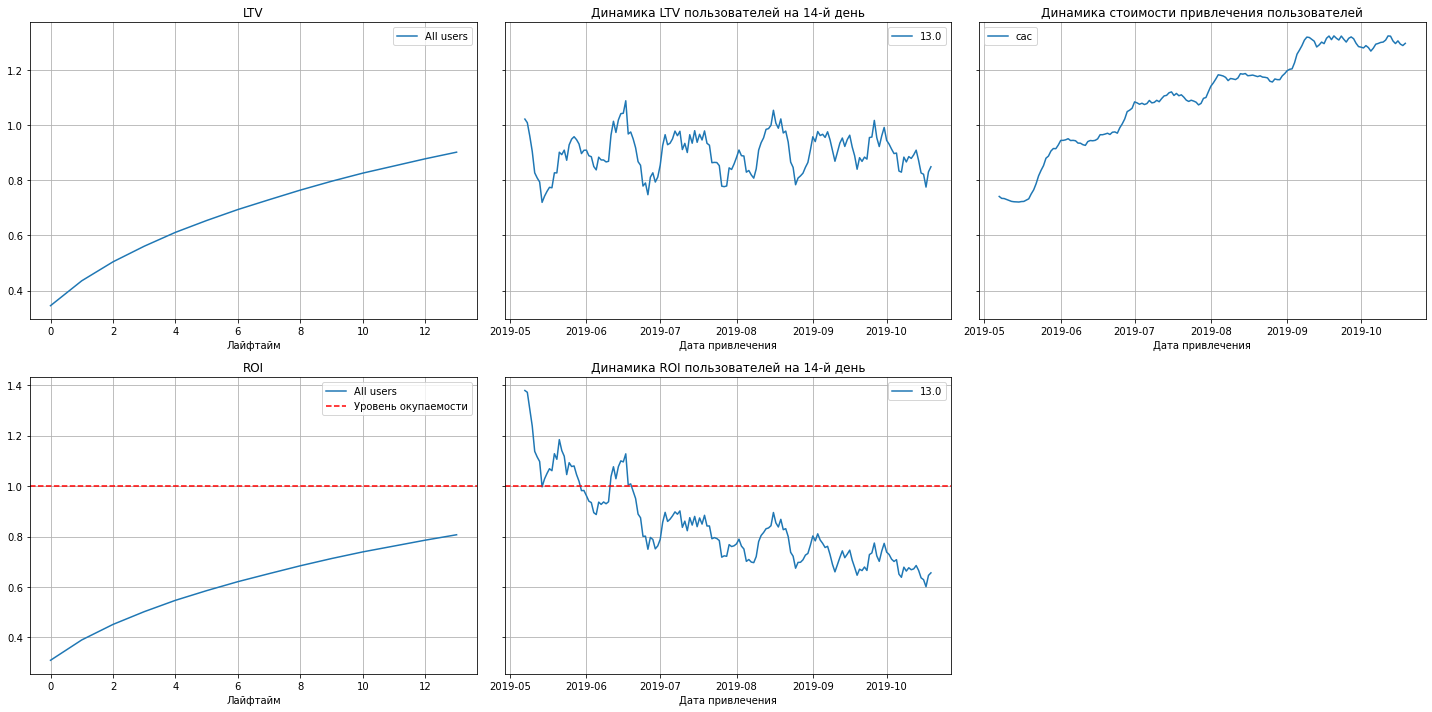

In [28]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По полученным графикам можно отметить следующие моменты:
- `ROI`

На настоящий момент реклама не окупается, ROI к концу второй недели показатель ROI едва превышает 80%. Причем, по графику динамики заметно, что для пользователей, привлеченных в мае, реклама окупалась, показатель ROI достигал значиний в 120-140%. 

Ситуация изменилась уже в июне, когда показатель ROI в середине месяца резко упал до значений, не превышающих 80% и более не поднимался выше 85%. При этом, можно заметить, что в октябре показатель окупаемости рекламы составляет не более 70%.

- `LTV`

Показатель пожизненной стоимости пользователя достаточно стабилен на протяжении всего изучаемого периода и составляет 0.8 - 1 у.е.

- `CAC`

В отношении CAC видно, что для пользователей, привлеченных в первой половине мая, этот показатель был наименьшим и не превышал 0.7 у.е. Однако в середине месяца показатель начал резко расти, и на конец мая достигал уже 0.9 у.е. Далее по времени мы можем наблюдать только стабильный рост этого показателя.
Возможно, тенденция к снижению показателя ROI связана с увеличением рекламного бюджета.

Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения. Сначала проанализируйте окупаемость рекламы с разбивкой по устройствам.

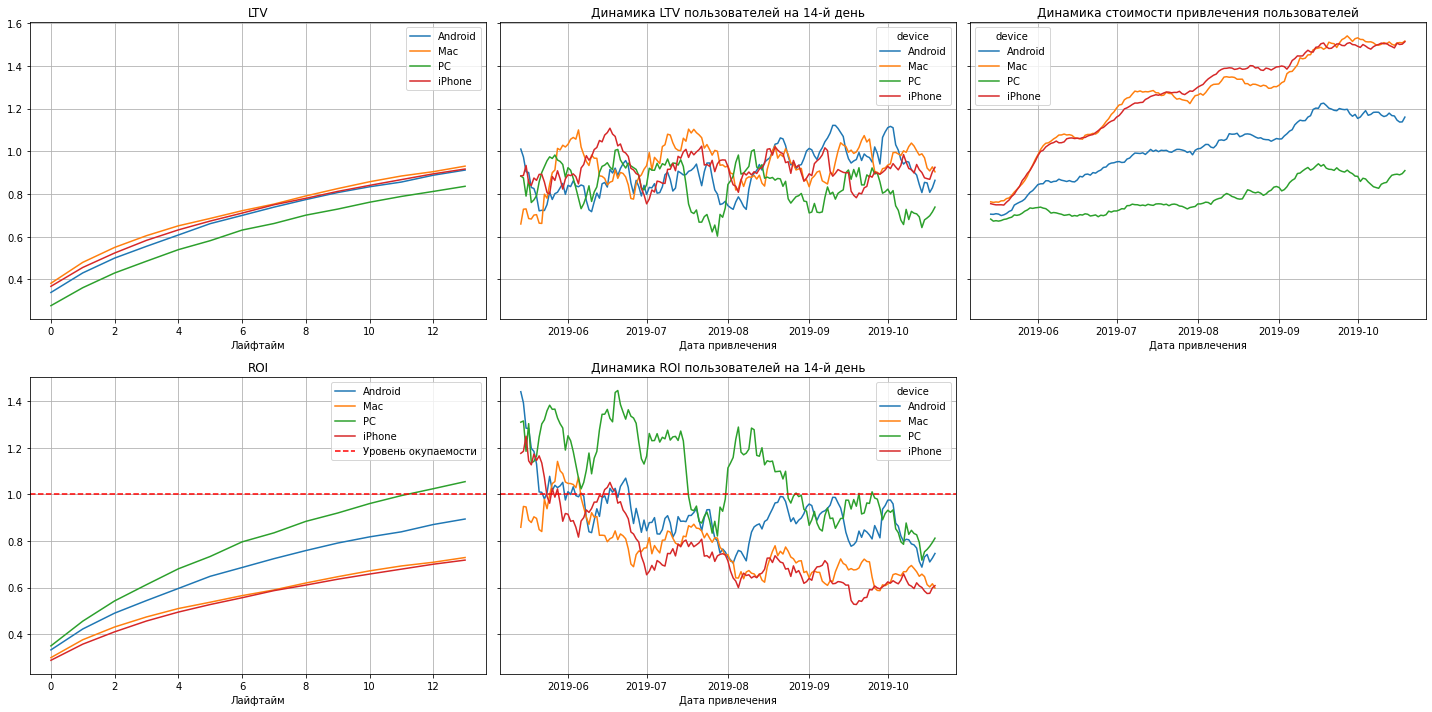

In [29]:
#посмотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

С разбивкой по устройством ситуация обстоит более интересно. По графикам видно, что к концу второй недедли окупаются только пользователи, пришедшие с PC. Причем, по динамике показателя на 14й день видно, что в последний месяц пользователи PC также не окупаеются, показатели для октября не превышают 80$.

Пользователи с устройств android, Mac и IPhone не окупается совсем. При этом для устройств android показатель ROI составляет почти 90% на 14й день, а с устройствами Mac и IPhone окупаемость намного ниже - к концу второй недели показатель ROI не превышает 70%.

Интересно, LTV пользователей PC , пришедших с конца июля, к 14му дню самый низкий среди всех устройст. Тем не менее, только на этих устройствах реклама когда-либо окупалась.

Вероятно, причина неокупаемости рекламы на остальных устройствах кроется в высокой стоимости привлечения пользователей. CAC для них превышает аналогичный показатель для устройств PC.

Посмотрим, как обстоят дела с окупаемостью в разных странах.

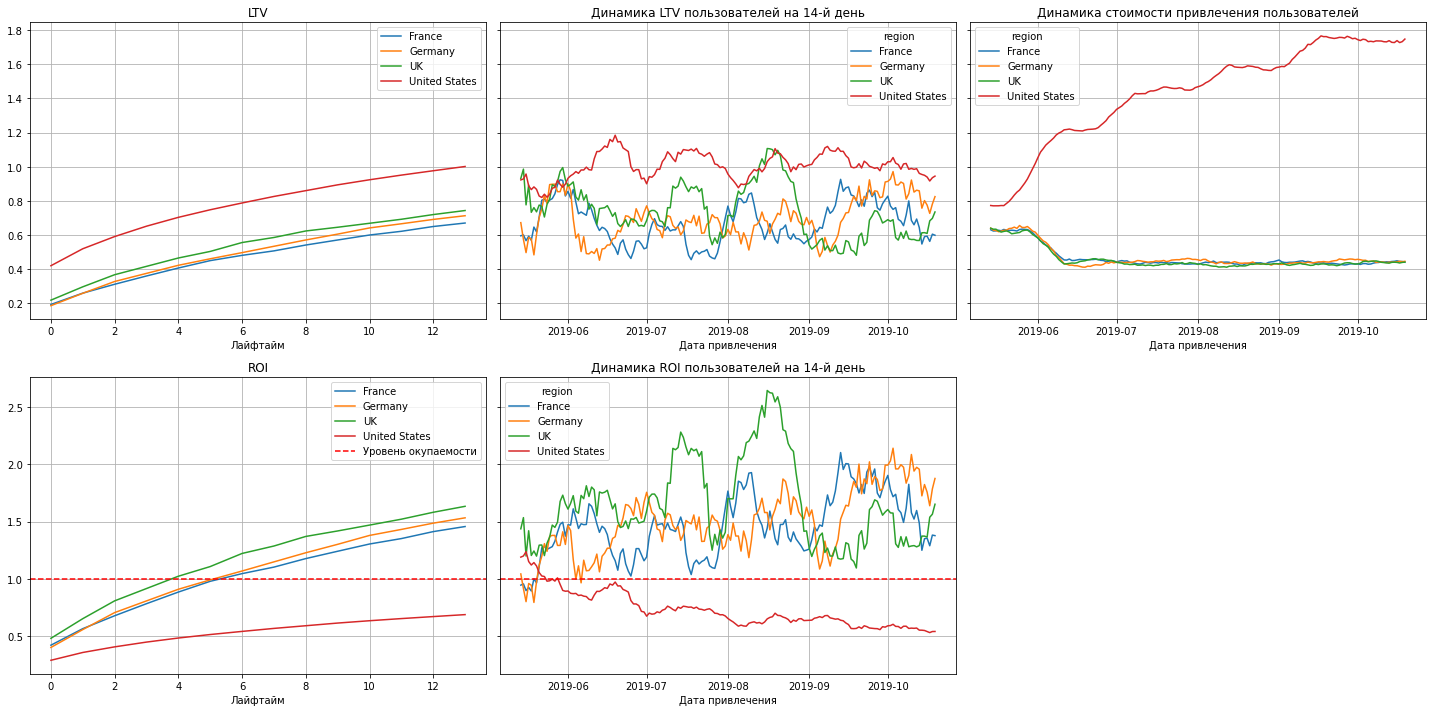

In [30]:
#посмотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Как показывают графики, с окупаемостью рекламы в странах Европы все стабильно хорошо. Реклама окупается уже к концу первой недели использования приложения - показатель ROI стабильно высокий для пользователей, привлеченных в любой период времени с 1го мая по 27го октября 2019 года. При этом, лучше всего реклама окупается в Великобритании. Так же можно заметить, что стоимость привлечени пользователей в Европе в разы ниже, чем этот показатель в США.

В то время, как реклама в США перестала окупаться уже к концу мая, несмотря на стабильно высокий показатель LTV для американских пользователей. Можно заметить, что пожизненная ценность клиентов из Америки значительно выше, чем LTV пользователей из Европы. Однако, и расходы на рекламу здесь в разы превышают рекламные траты в Европе - более 1.5 у.е. в США против 0.4 у.е. в странах Европы.

Учитывая, что покупатели из США составляют более 70% от всех платящих пользователей приложения, логично предположить, что именно эта когорта пользователей критически влияет на общий показатель окупаемости рекламы.

Вероятнее всего, проблемы с окупаемость рекламы для пользователей Android, IPhone и Mac связана не с техническими особенностями этих устройств, а с тем, что число пользователей этих устройст  в США, где реклама стабильно не окупается, значительно выше, чем в странах Европы.

Проверим эту гипотезу - еще раз посмотрим окупаемость с разбивкой по устройствам, но с учетом страны пользователя.

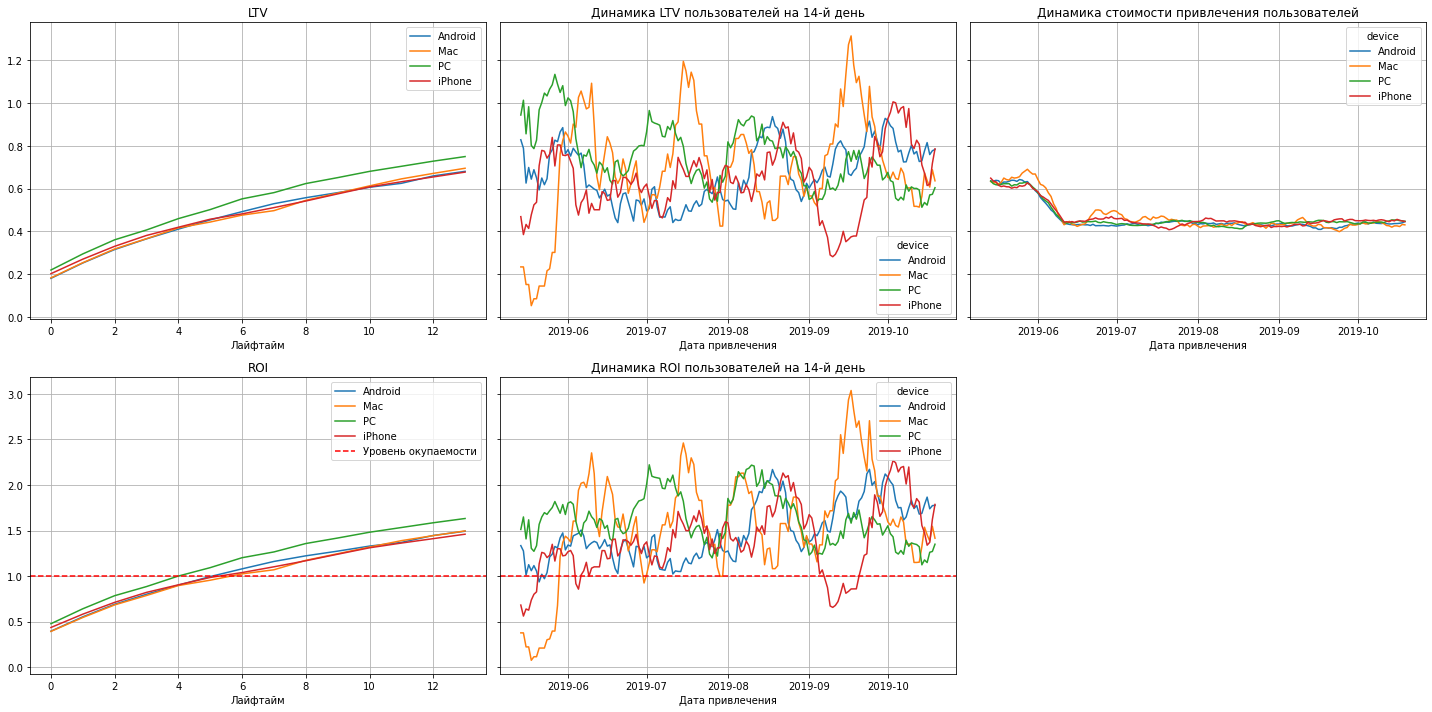

In [31]:
#посмотрим окупаемость с разбивкой по устройствам для стран Европы

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered.query('region != "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
) #исключаем все записи с регионом "United States"

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Гипотеза подтвердилась, в странах Eвропы, действительно, все в порядке с окупаемостью рекламы среди пользователей, пришедших с android, Mac и IPhone. На графике ROI видно, что для любых устройств реклама окупается уже к концу первой недели использования приложения, причем это справедливо для пользователей, пришедших практически в любой из дней в течении изучаемого периода. Небольшое исключение - пользователи IPhone, пришедшие в сентябре, окупились лишь на 70-75%. Так же можно заметить, что пользователи  IOS в мае, по какой-то причине, окупались крайне плохо. Однако, это не влияет критически на общую картину.

Проверим окупаемость рекламы для разных устройств для пользователей из Америки.

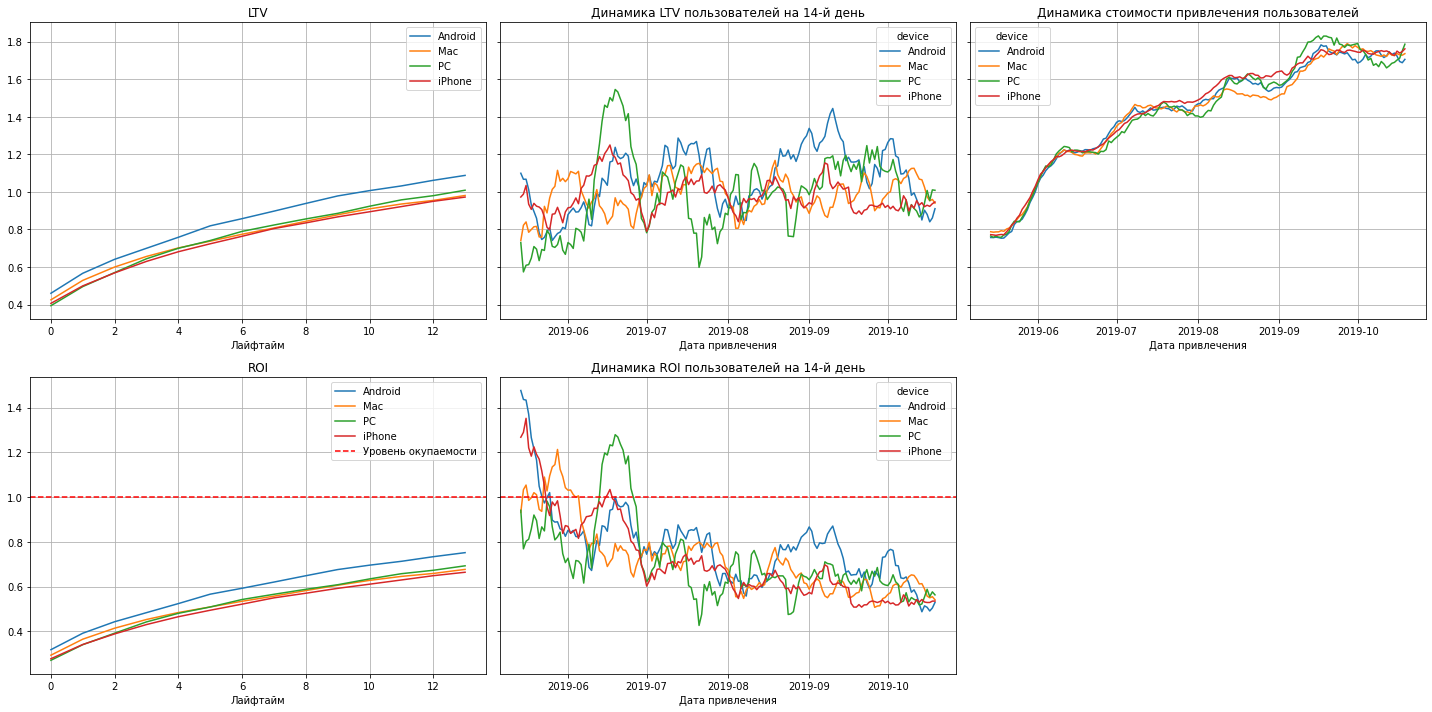

In [32]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered.query('region == "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

В отличии от стран Европы, ситуация в США намного хуже. Начиная с июля здесь реклама не окупается в принципе, причем показатель ROI стабильно низкий для любых устройств, несмотря на достаточно высокие показатели LTV. 
Что еще раз говорит о том, что проблема заключается не в технических характерисках устройств и не в технических проблемах.

График динамики стоимости привлечения пользователей, как мы уже указывали, показывает скачок показателя САС в середине мая 2019, после чего и стала снижаться окупаемость рекламы.

Посмотрит, как окупались разные рекламные источники.

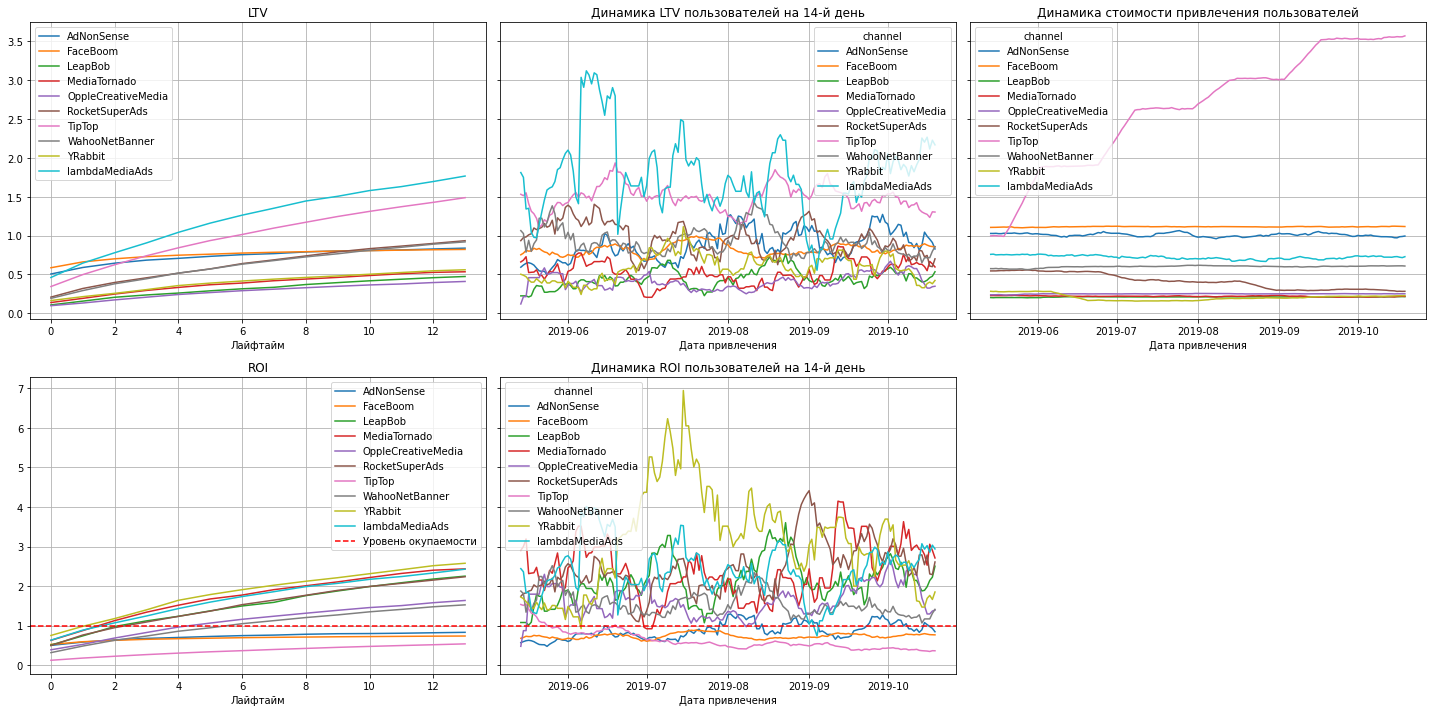

In [33]:
#посмотрим окупаемость с разбивкой по каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

На графиках видно, что из 10 рекламных каналов не окупаются три - TipTop, c показателем ROI чуть выше 50% на конец второй недели, faceBoom с окупаемостью в 80% и канал AdNonSense с ROI около 90%. Причем, канал FaceBoom не окупался никогда, а TipTop окупался только в первой половине мая. Но несмотря на это, расходы на рекламу в канале TipTop продолжают расти от месяца к месяцу. Несмотря на то, что LTV пользователей здесь одно из самых высоких, очевидно, что канал очень невыгоден для компании.

Проверим, как работают рекламные каналы для США и стран Европы отдельно.

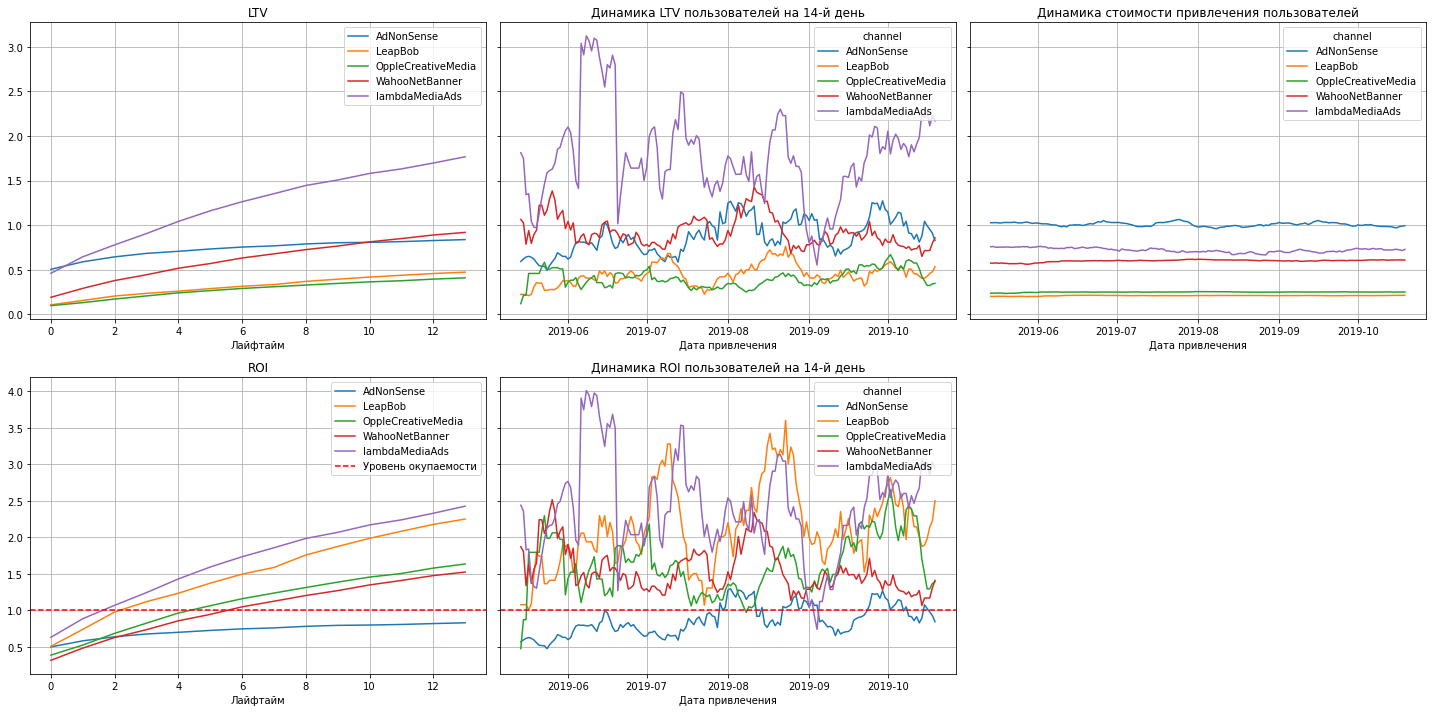

In [34]:
#посмотрим окупаемость с разбивкой по каналам для стран Европы
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered.query('region != "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Как видно из графиков, для Европы и США работают разные рекламные каналы. Для Германии, Франции и Великобритании это adNonSense, LeapBob, OppleCreativeMedia, WahooNetBAnner и lambdaMediaAds.
Только один канал, adNonSense, здесь убыточен. Однако, это не оказывает критического влияния на окупаемость рекламы в целом. Как нам удалось выяснить ранее, показатель ROI в странах Европы к концу недели стабильно превышает 100%.

Несмотря на то, что канал adNonSense приносит приложению большое количество платящих пользователей, это не самые "качественные" пользователи. Если оценивать LTV на конец второй недели, то можно заметить, что пользователи, пришедшие через канал lambdaMediaAds совершают покупки на самую большую сумму, в среднем LTV здесь составляет около около 2 у.е., что значительно выше LTV пользователей, пришедших с других каналов. При этом, LTV ддя пользователей, пришедших с adNonSense, уступает не только вышеуказанному каналу, но и LTV пользователей WahooNetBAnner.

Это замечание справедливо практически для любого периода в течении изучаемого отрезка времени.

Возможно, маркетологам следует обратить внимание на каналы с более качественными пользователями, перераспределив бюджеты с убыточного рекламного канала. К этому предположению вернемся во время изучения конверсии и удержания пользователей.

Теперь посмотрим, как обстоят дела с рекламнымси каналами в США. 

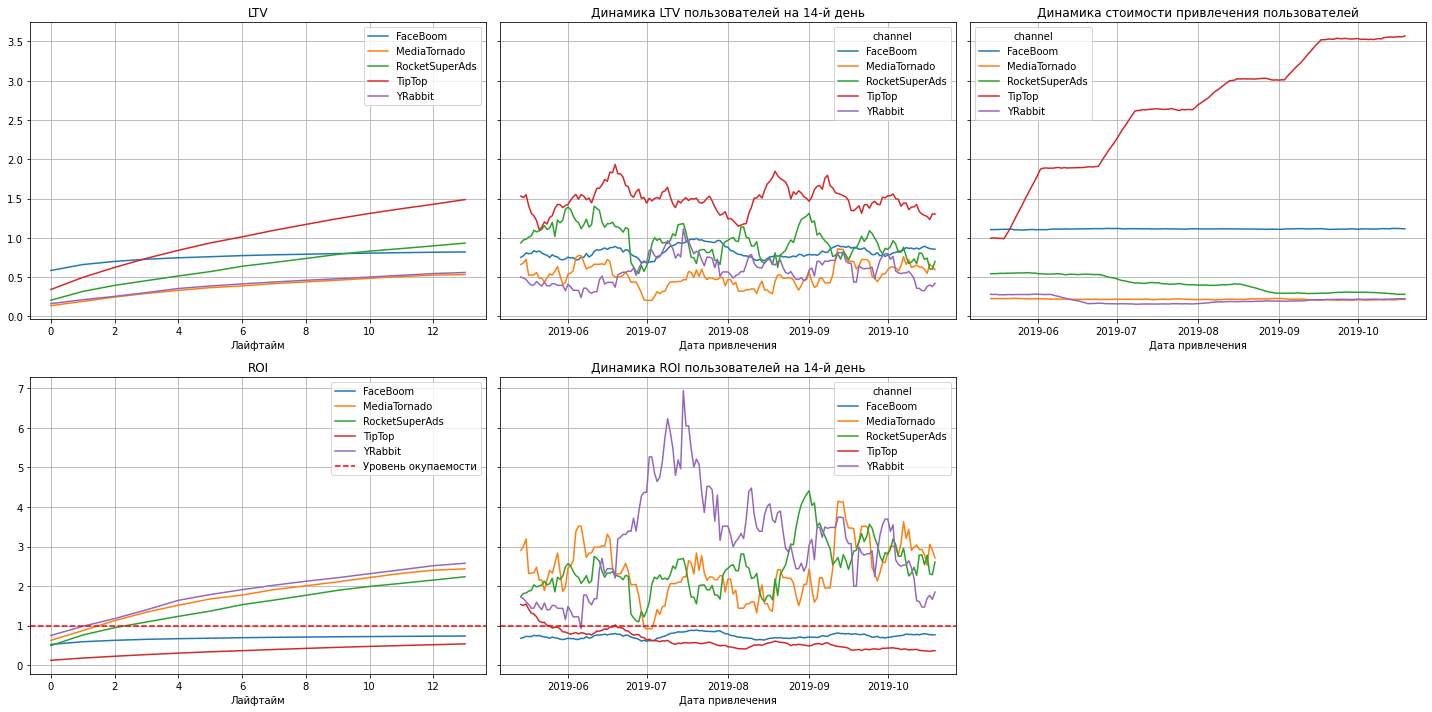

In [35]:
#посмотрим окупаемость с разбивкой по каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered.query('region == "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Для США есть так же пять рекламных каналов, три из которых окупаются уже в первую неделю. Однако, реклама в каналах TipTop и FaceBoom, привлекающих наибольшее кол-во пользователей, не окупается никогда. Показатель ROI здесь не превышает 80%, и это справедливо для любой когорты пользователей.

Тем не менее, на рекламу именно в этих рекламнеых каналах тратится наибольшие суммы из бюджета. Стоимость привлечения одного пользователя для канала TipTop постоянно растет и на конец изучаемого периода составляет максимальные 3.5 у.е. CAC для FAceBoom более стабилен и составляет стабильные 1.2 у.е. на протяжении всего изучаемого периода. Однако, расходы на остальные реламные источники значительно ниже и не превышают 0.5 у.е.

Что бы разобраться, по какой причине большая часть бюджета распределется на убыточные каналы, посмотрим на конверсию и удержание пользователей.

### 5.2 Изучение конверсии и удержания пользователей приложения из США <a class="anchor" id="5.2"></a>

Для начала оценим общую конверсию покупателей для разных стран.

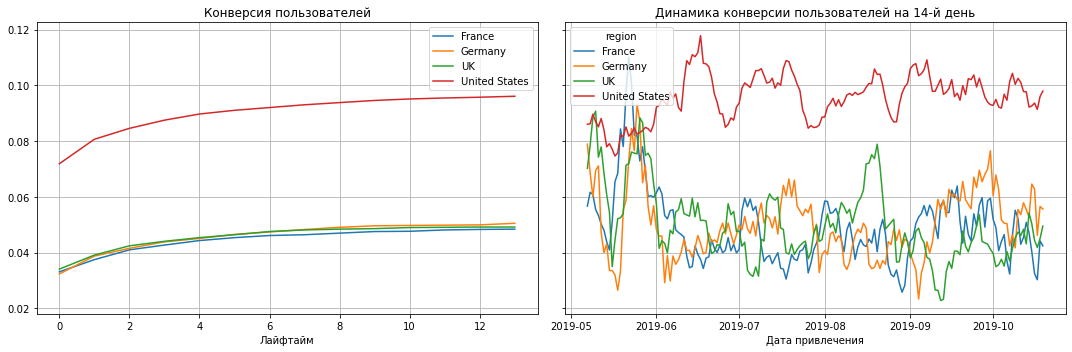

In [36]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей США более, чем в 1.5 раза превышает конверсию пользователей из стран Европы. Пользователи из США с июня месяца конвертируются стабильно хорошо - на 14й день показатель составляет почти 10%. В то время, как для европейских пользователей показатель конверсии не превышает 5%.

Вероятно, такая высокая конверсия среди американцев подтолкнула маркетологов к увеличению бюджетов на рекламу в этом регионе.

Оценим конверсию для пользователей из США в разрезе каналов привлечения.

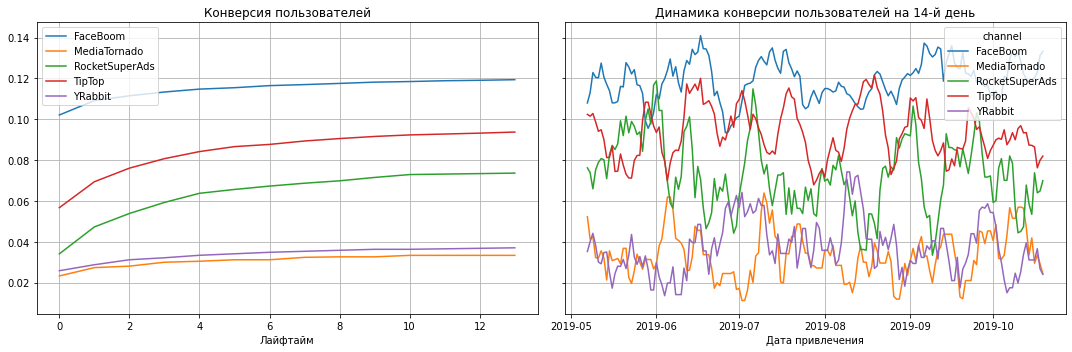

In [37]:
# смотрим конверсию с разбивкой по каналам в США
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_filtered.query('region == "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи из FAceBoom стабильно конвертируются очень хорошо, 12% к 14-му дню - показатель очень высокий. Пользователи из TipTop так же имеют хороший процент конверсии - почти 10%. 
Неудивительно, что маркетологи сделали ставку на эти каналы. 

Однако, несмотря на высокую конверсию, реклама здесь на окупается. Возможно, проблема состоит в удержании.

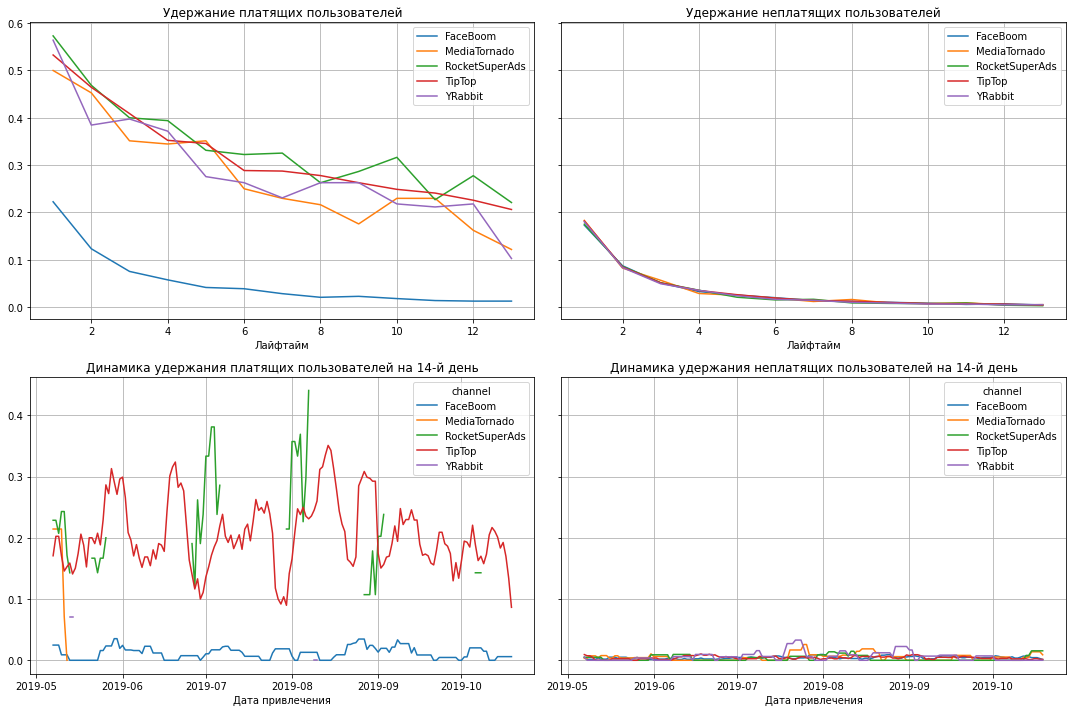

In [38]:
#посмотрим удержание с разбивкой по каналам для США

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_filtered.query('region == "United States"'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Действительно, удержание платящих пользователей, пришедших через канал faceBoom значительно отличается от показателей других рекламных источников в меньшую сторону. В конце второй недели удержание почти равно 0, это очень низкий показатель, особенно в сравнении с удержанием пользователей из других источников.

Маркетологам следуют обратить особое внимание на этот канал и, возможно, сформировать новую задачу по анализу проблем с удержанием для его пользователей. Возможно, у этого канала есть свои особенности в отношении целевой аудитории и конкуренции среди похожих приложений. Если решить вопрос с удержанием пользователей, привлеченных через faceBoom, то этот рекламный источник может стать очень перспективным в будущем.

В отношении канла TipTop все более очевидно. Пользователи здесь конвертируются очень хорошо, и удерживаются тоже очень хорошо, однако постоянно растущие траты на рекламу не дают выйти каналу в плюс.
Маркетологам стоит пересмотреть рекламный бюджет и изучить возможности и способы уменьшения трат на рекламу. В противном случае, приложение не сможет выйти на окупаемость рекламы в этом источнике. А дальнейшее увеличение расходов для этого рекламного каналаприведет к еще бОльшим убыткам для компании.

Проверим удержание по устройствам.

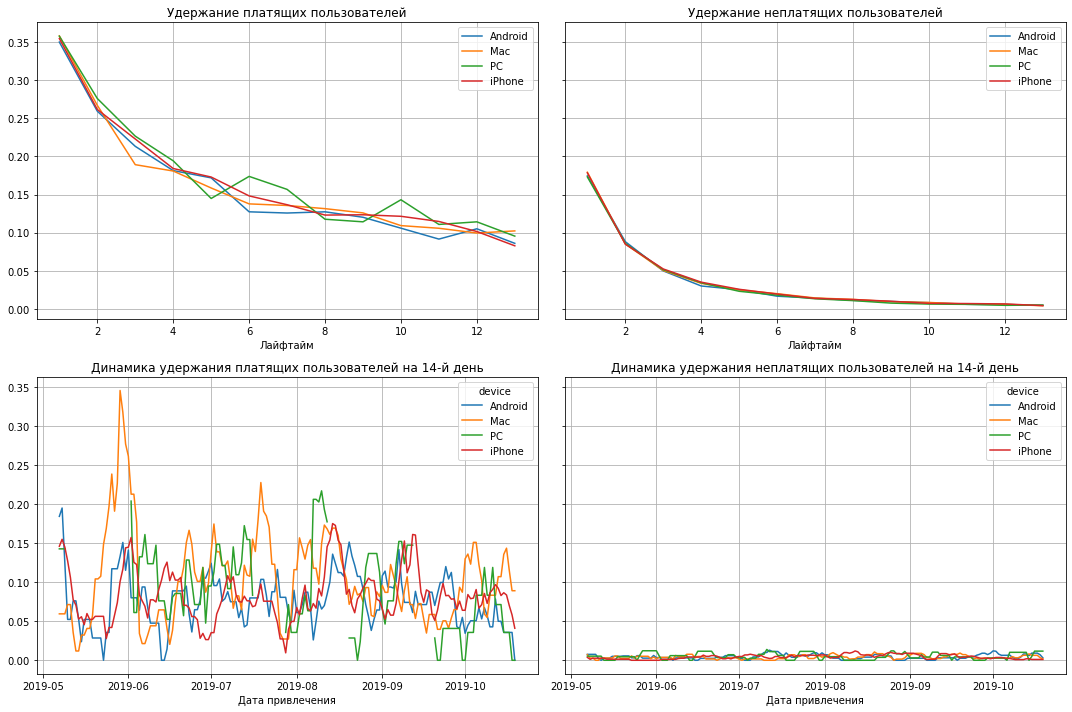

In [39]:
#посмотрим удержание с разбивкой по устройствам для США
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_filtered.query('region == "United States"'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

С удержанием по устройствам все достаточно стабильно и равномерно. 

Однако, можно обратить внимание на аномально высокие показатели удержания для пользоватлей Mac, пришедших во второй половине мая и в середине июля. Возможно, есть смысл изучить особенности приложение для устройства Mac в указанные периоды, что бы выявить факторы, которые могли поспособствовать высоко заинтересованности. И иметь возможность учесть их в будущем.

### 5.3 Изучение конверсии и удержания пользователей приложения из стран Европы <a class="anchor" id="5.3"></a>

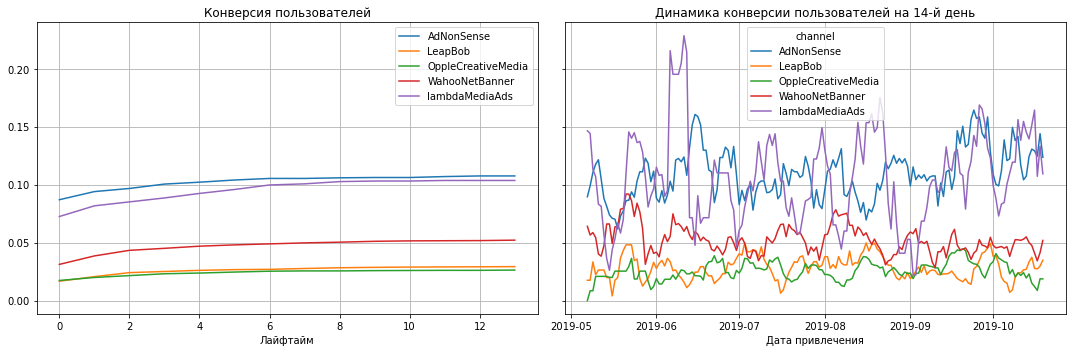

In [40]:
# смотрим конверсию с разбивкой по каналам в Европе
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_filtered.query('region != "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

В Европе можно выделить каналы adNonSense и lambdaMediaAds. Конверсия пользователей, пришедших через эти каналы самая высокая - около 11%. Ориентируясь на график динамики конверсии в конце второй недели можно сказать, что конверсия для adNonSense стабильно высокая, а для канала lambdaMediaAds показатель скачит от очень высоких, более 20%, до низких значений в 5%. Тем неменее средний процент конверсии остается высоким для этого канала.

Посмотрим, как в странах Европы обстоят дела с удержание клиентов.

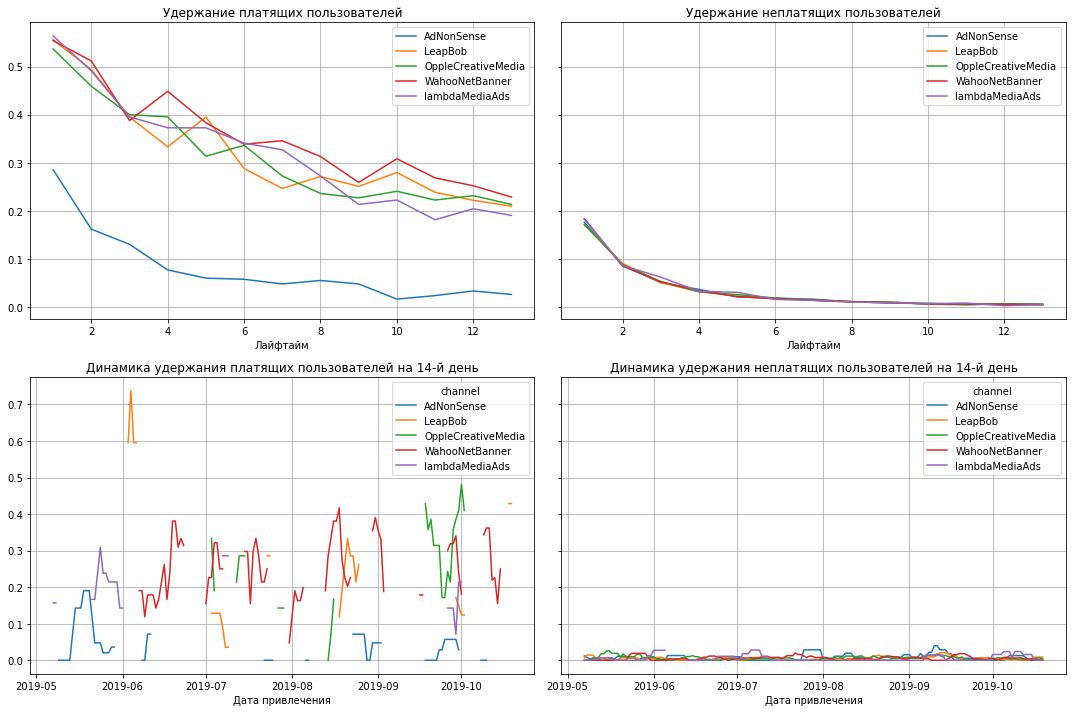

In [41]:
#посмотрим удержание с разбивкой по каналам для Германии, Вкликобритании и Франции

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_filtered.query('region != "United States"'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Вырисовывается ситуйация, схожая с рекламными источниками в США. Все каналы, кроме adNonSense, показывают примерно одинаковые значения удержания на протяжении двух недель. Удержание же пользоватлей, пришедших через adNonSense удерживаются стабильно крайне плохо.

Посмотрим, может ли это быть связано с техническими особоенностями одного из типа устройств.

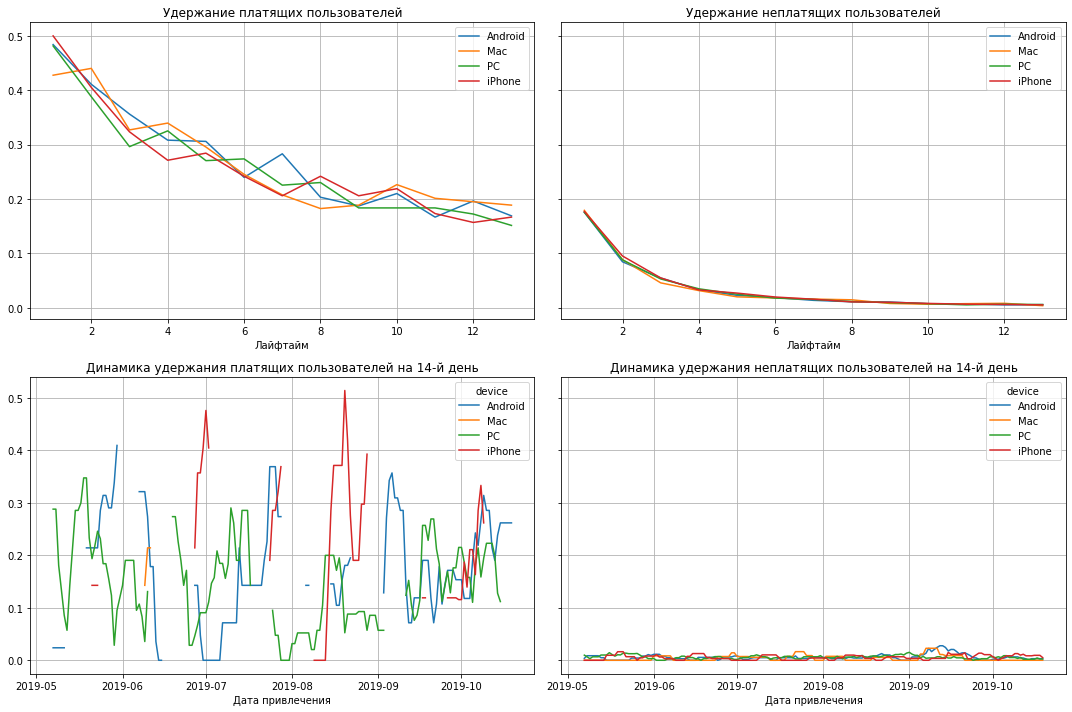

In [42]:
#посмотрим удержание с разбивкой по устройствам для Европы
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_filtered.query('region != "United States"'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Гипотеза не подвердилась, удержание пользователей на всех устройствам примерно одинаковое. Значит, дело не в технических устройствах, а в особенностях канала, его настроек или целевой аудитории, аналогично американскому каналу FaceBoom.
Маркетологам следует дополнительно изучить этот вопрос и найти дополнительные способы удержания пользоватлей. В этом случае канал adNonSense вместо единственного в Европе убыточного, сможет стать очень перспективным рекламным источиком.

Еще один потенциально интересный рекламный источник - lambdaMediaAds. Средняя конверсия здесь очень хорошая, почти равна конверсии канала adNonSense, а так же здесь все в порядке с удержанием. Стоит дополнительно изучить периоды, когда конверсия была максимально высокой для пользователей из этого источника, и вероятно, подумать об увеличении бюджета на рекламу здесь.

### 5.4 Вывод <a class="anchor" id="5.4"></a>

В ходе исследования эффективности рекламных кампаний мы определили, что для стран Европы и Сша действуют различные рекламные каналы.

**Для Европы это каналы adNonSense, LeapBob, OppleCreativeMedia, WahooNetBAnner и lambdaMediaAds**. При этом, все каналы, кроме adNonSense хорошо и стабильно окупаются на протяжении всего изучаемого периода. 

Канал `adNonSense`, при этом, имеет самый высокий показатель конверсии среди новых пользователей - 12% на конец второй недели. Однако, это не спасает его от убыточности на протяжении всего периода времени. По гоафику динамики CAC для стран Европы с разбивкой по каналам привлечения можно заметить, что и рекламные траты на этом канале выше, чем в любом другом европейском рекламном источнике, что могло бы стать основной причиной неокупаемости рекламы. Но анализ графика удержания гвоорит о том, что основная проблема кроется именно в удержании. Графи пожизненной стоимости пользователя так же говорит о возможных проблемах с удержанием. Ведь при таком высоком уровне конверсии, показатель LTV для канала adNonSense составляет всего 0.75 у.е., что меньше аналагичного показателя для двух других рекламных истоников.

Маркетологам следует дополнительно изучить этот вопрос и найти дополнительные способы удержания пользоватлей, пришедших через adNonSense. В случае, если это удасться, вместо единственного в Европе убыточного, этот канал сможет стать очень перспективным рекламным источиком.

Так же стоит обратить внимание канал lambdaMediaAds. Показатели конверсии здесь так же достаточно высоки, около 12%, и так же здесь все в порядке с удержанием. Кроме того, есть периоды, например, июль 2019 года, когда реклама здесь окупалась на 400%,. Стоит дополнительно изучить периоды, когда конверсия и окупаемость на этом канале были максимально высокими, и подумать об увеличении бюджета на рекламу здесь с учетом полученных результатов.

**Для США есть так же пять рекламных каналов: FaceBoom, MediaTornado, RocketSuperAds, TipTop и YRabbit**. Для трех из них реклама окупаентся в первые же дни использования пользователем приложения. Для двух других, наиболее крупных каналов, реклама не окупается никогда.

Несмотря на тот факт, что канал `TipTop` привлекает наиболее "качественных" пользователей,  LTV пользователей из этого источника достигает наибольших значений на 14й день жизни - 1.5 у.е., в то время как остальные источники не дотягивают даже до 1у.е.. (кроме того, этот показатель достаточно стабилен для пользователей, пришедших в любой моемнт времени в течении изучаемого периода), реклама на этом канале не окупается даже на 50%. 

Команда Приложения продолжает активно вкладывает бюджет именно в этот канал, с каждым месяцем траты на рекламу здесь стабильно растут. Вероятно, это связано с высокими показателями конверсии для пользователей, пришедших отсюда, около 10% на конец второй недели, что делает канал TipTOP достаточно перспективным.

Однако, прибыль от привлеченных пользлователей даже при учете высокой конверсии и стабильного удержания, не перекрывает растущих расходов. Маркетологам стоит пересмотреть рекламный бюджет и изучить возможности и способы уменьшения трат на рекламу. В противном случае, приложение не сможет выйти на окупаемость рекламы в этом источнике. А дальнейшее увеличение расходов для этого рекламного канала приведет к еще бОльшим убыткам для компании.

В отношении канала `FaceBoom` ситуация обстоит несколько иначе. Главная проблема здесь - это плохое удержание пользователей. В конце второй недели удержание почти равно 0, это очень низкий показатель, особенно в сравнении с удержанием пользователей из других источников. При этом, именно для пользователей из этого источника сымая высокая конверсия - 12%.

Маркетологам следуют обратить особое внимание на этот канал и, возможно, сформировать новую задачу по анализу проблем с удержанием для его пользователей. Возможно, у этого канала есть свои особенности в отношении целевой аудитории и конкуренции среди похожих приложений или особенности настроек рекламного источника. Если решить вопрос с удержанием пользователей, привлеченных через faceBoom, то этот рекламный источник может стать очень перспективным в будущем.

Примечательно то, что судя по графику динамики ROI в Америке есть еще продуктивные рекламные каналы. Канал RocketSuperAds показывает хорошие результаты и в отношении показателя LTV, конверсии и удержания. Возможно, стоит обюратить более пристальное внимание на возможность перераспределения бюджета в сторону перспективных источников.

## 6. Итоги исследования <a class="anchor" id="6"></a>

Мы изучили данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года, заказах и рекламных расходах развлекательного приложения Procrastinate Pro+.

В ходе исследования нам удалось:
- определить регионы и рекламные каналы, привлекающие наибольшее количество платящих пользователей,
- изучить общие рекламные расходы компании,
- проанализировать динамику изменения стоимости привлечения пользователей,
- изучили показатели LTV b ROI в разрезе анализа окупаемости рекламы,
- проанализировали окупаемость рекламы по странам, каналам и устройствам,
- изучили показатели конверсии и удержания пользователей,
- определили факторы, мешающие привлечению клиентов.

Изучение данных показало, что пользователи развлекательного приложения Procrastinate Pro+ приходят из стран Европы: Германия, Франция и Великобритания, и из Соединенных Штатов Америки, используя четыре вида устройств: Android, Mac, IPhоne и персональный компьютер (PC). Источники привлечения пользователей отличаются для стран Европы и США. В Европе компания использует такие каналы, как adNonSense, LeapBob, OppleCreativeMedia, WahooNetBAnner и lambdaMediaAds, а в США - это FaceBoom, MediaTornado, RocketSuperAds, TipTop и YRabbit.

Абсолютный лидер по количеству привлеченных клиентов - это Соединенные Штаты Америки, на долю которых приходится более 100000 новых пользователеей за период с 1.05 по 27.10.2019. В то время, как число новых пользователей из Великобритании, Франции и Германии не превышает 17.5 тысяч человек на каждую из стран. 

**Изучение соотношения платящих пользователей** показало, что американцы составляют 78% от общего числа платящих пользователей приложения. На долю платящих пользователей Великобритании, Франции и Германии приходится не более 8% покупателей.

Наиболее популярным устройством среди пользователей является смартфон IPhone. Причем это справедливо, как для общего числа привлеченных пользователей, которое составляет 54.5 тыс человек, так и для количеситва платящих пользователей, доля которых составляет 38% от общего количества покупателей. Устройства на android так же популярны, однако показатели все же ниже: 35тыс новых пользователей, 23% - доля платящих с утого типа устройств. В отношении персональных компьютеров (Mac и PC) интересно то, что количество привлеченных пользователей здесь почти одинаковое и составляет около 30тыс человек. При этом пользователи Mac более охотно становятся покупателями, доля платящих пользователей здесь составляет 23% от общего числа. В то время как для PC этот показатель не превышает 17%.

Среди рекламных каналов выделяются три канала, которые привели наибольшее количество новых пользователей за исследуемый период. К ним относятся канал "organic", то есть пользователи, пришедшие самостоятельно, более 54тыс новых пользователей, канал FaceBoom, почти 30тыс человек, и канал TipTop, черезк который пришло почти 20 тыс пользователей. Однако, можно заметить, что самостоятельно пришедшие пользователи неохотно становятся покупателями, на их долю приходится лишь 13% от общего числа покупателей. Самым щедрым на платящих пользователей оказался канал FaceBoom, здесь доля покупателей составляет почти половину - 40%. Для канала TipTop этот показатель составляет 28% от общего числа. Остальные рекламные каналы привлекли от 2тыс до 8.5тыс новых пользователей, при этом процент покупателей, пришедших через эти каналы, составляет не более 5% от общего количества.

**Анализ маркетинговых затратах** выявил наиболее дорогие рекламные источники для компании. 

Так, канал TipTop стал самым дорогим рекламным каналом, траты на рекламу здесь превысили 54 тыс у.е., что составляет более половины всего бюджета, потраченного на рекламные кампании: общая сумма расходов на маркетинг за период с 01.05 по 27.10.2019 составила 105.5 тысяч у.е. При этом стоимость рекламы в этом канале постоянно растет.

Канал FaceBoom находится на втором месте по сумме трат на рекламные кампании. Реклама здесь обходится компании в стабильные 5.5-6 тысяч у.е. в месяц, а стоимость привлечения клиента составляет всего 1.1 у.е, что в 3 раза меньше, чем этот же показатель для канала TipTop.
Остальные рекламные каналы обходятся компании в разы дешевле.

**В результате изучения окупаемость рекламы** было выявлено, что, с окупаемостью рекламы в странах `Европы` все достаточно хорошо. Реклама окупается уже на первой неделе использования приложения для пользователей, пришедших из всех каналов, кроме adNonSense. Канал adNonSense, при этом, имеет самый высокий показатель конверсии среди новых пользователей - 12% на конец второй недели. Однако, анализ удержания пользователец показал, что именно здесь кроется основная проблема. Пользователи adNonSense стабильно удерживаются очень плохо. Причем, этот показатель не зависит от типа устройств, а значит не вызван их техническими характеристиками..

<span style="color:orange">Маркетологам следуют обратить особое внимание на этот канал и, возможно, сформировать новую задачу по анализу проблем с удержанием для его пользователей. Возможно, у этого канала есть свои особенности в отношении целевой аудитории, конкуренции среди похожих приложений или технических настроек. Если решить вопрос с удержанием пользователей, привлеченных через adNonSense, то этот рекламный источник может стать самым  перспективным в Европе в будущем.</span>

<span style="color:orange">Так же стоит обратить внимание канал lambdaMediaAds. Показатели конверсии здесь так же достаточно высоки, около 12%, и все в порядке с удержанием. Кроме того, есть периоды, например, июль 2019 года, когда реклама здесь окупалась на 400%,. Стоит дополнительно изучить периоды, когда конверсия и окупаемость на этом канале были максимально высокими, и подумать об увеличении бюджета на рекламу здесь с учетом полученных результатов.</span>

А вот в `Соединенных Штатах Америки` ситуация намного хуже. И учитывая, что покупатели из США составляют более 70% от всех платящих пользователей приложения, логично предположить, что именно эта когорта пользователей критически влияет на общий показатель окупаемости рекламы.

Основное препятствие к окупаемости рекламы в Америке - это неэффективность в самых крупных рекламных каналах TipTop и FaceBoom.

Несмотря на тот факт, что канал TipTop привлекает наиболее "качественных" пользователей, а LTV пользователей из этого источника достигает наибольших значений на 14й день жизни, реклама на этом канале не окупается даже на 50% из-за постоянно возрастающих расходов на рекламу здесь. 

Команда Приложения продолжает активно вкладывает бюджет именно в этот канал, вероятно, ориентируясь на высокие показатели конверсии, что делает канал TipTор достаточно перспективным.
Однако, прибыль от привлеченных пользлователей даже при учете высокой конверсии и стабильного удержания, не перекрывает растущих расходов. 

<span style="color:orange">Маркетологам стоит пересмотреть рекламный бюджет и изучить возможности и способы уменьшения трат на рекламу. В противном случае, приложение не сможет выйти на окупаемость рекламы в этом источнике. А дальнейшее увеличение расходов для этого рекламного канала приведет к еще бОльшим убыткам для компании.</span>

В отношении канала FaceBoom ситуация обстоит несколько иначе. Главная проблема здесь - это плохое удержание пользователей. В конце второй недели удержание почти равно 0, это очень низкий показатель, особенно в сравнении с удержанием пользователей из других источников. При этом, именно для пользователей из этого источника сымая высокая конверсия - 12%.

<span style="color:orange">Маркетологам следуют обратить особое внимание на этот канал и, возможно, сформировать новую задачу по анализу проблем с удержанием для его пользователей. Возможно, у этого канала есть свои особенности в отношении целевой аудитории и конкуренции среди похожих приложений или особенности настроек рекламного источника. Если решить вопрос с удержанием пользователей, привлеченных через faceBoom, то этот рекламный источник может стать очень перспективным в будущем.</span>

Примечательно то, что в Америке есть еще продуктивные рекламные каналы. Например, канал RocketSuperAds имеет очень хорошие показателя LTV, конверсии и удержания. 

<span style="color:orange">Возможно, стоит обюратить более пристальное внимание на возможность перераспределения бюджета в сторону перспективных источников.</span>

[К оглавлению](#start)